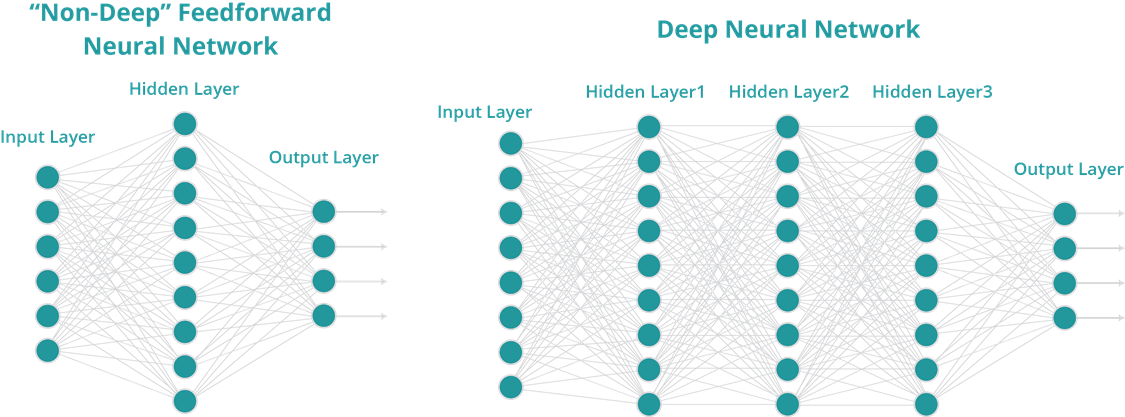

Neurons are the building blocks of neural networks. They are single point mathematical operations that are chained together to create an artifical neural network that is loosely based on the brain. 

$A_{in} = A_nW_n + B$

$A_{in} = (A_1W_1) + (A_2W_2) + (A_3W_3) + B$


$Y = F(A_{in}) = A_{out}$


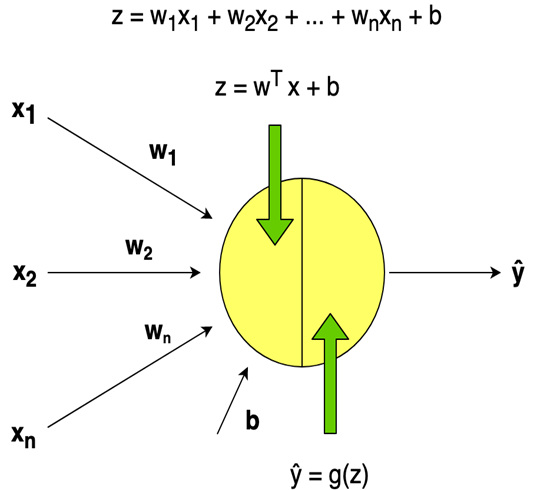

Activation functions change how the neurons are able to fire. Some functions let in negative values and some don't. Some scale the weights and some don't. They all change how $A_{out}$ is processed other than a linear function. 
 
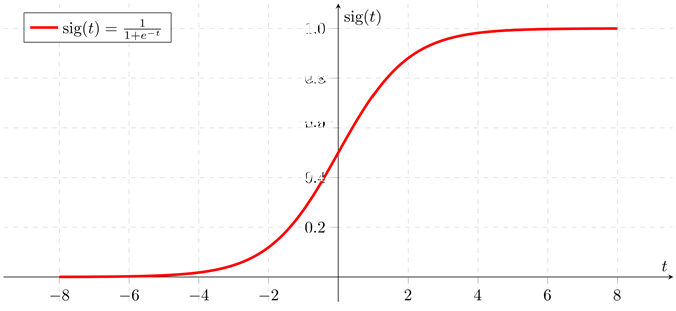

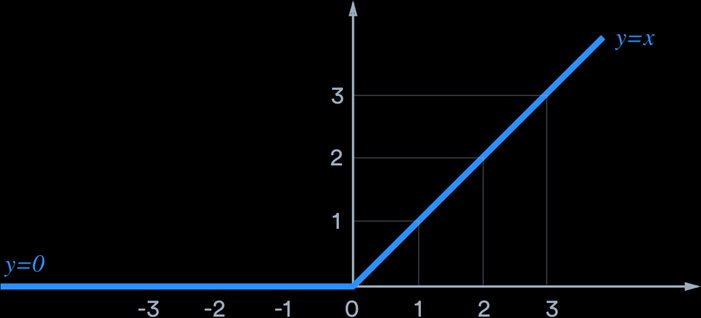

Weights are how we connect neurons and control the overall values in our network. Updating weight values is how neural networks learn and create their abstract numerical representations of the data they are learning on.

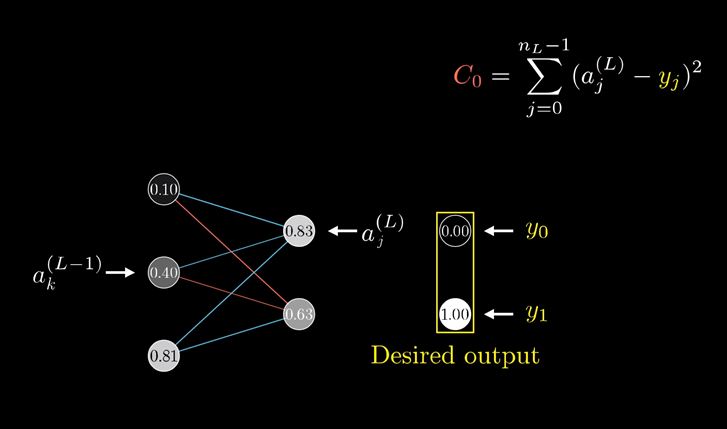

Bias determines what kind of weights can be allowed through the activation function. 

$A_{in} = (A_1W_1) + (A_2W_2) + (A_3W_3) + B$ gets fed into $F()$ to get a final value $A_{out}$. If B is very large or very small only a certain type of weight will be allowed to pass through or the results will be biased towards certain values. Hence the name.

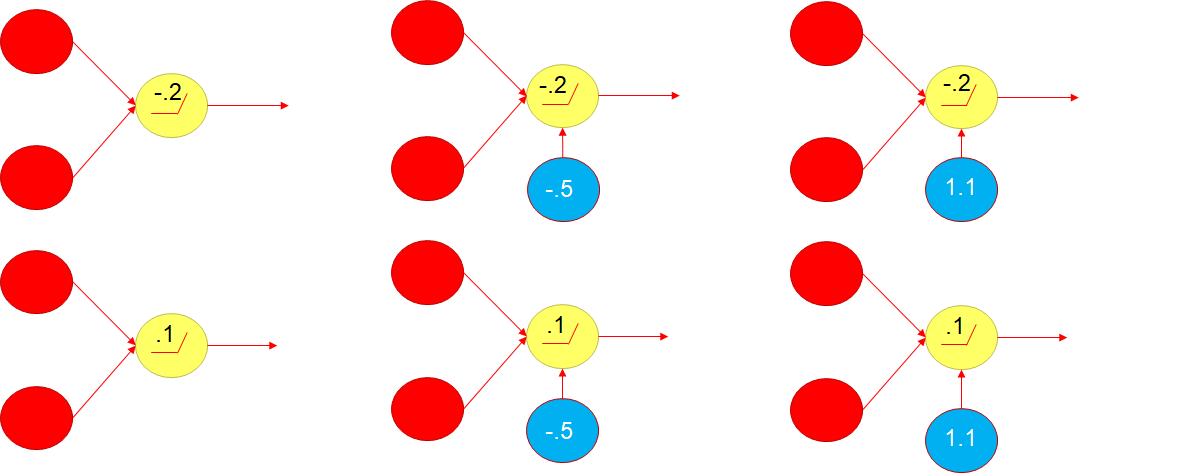

#### Example of a Neural network learning

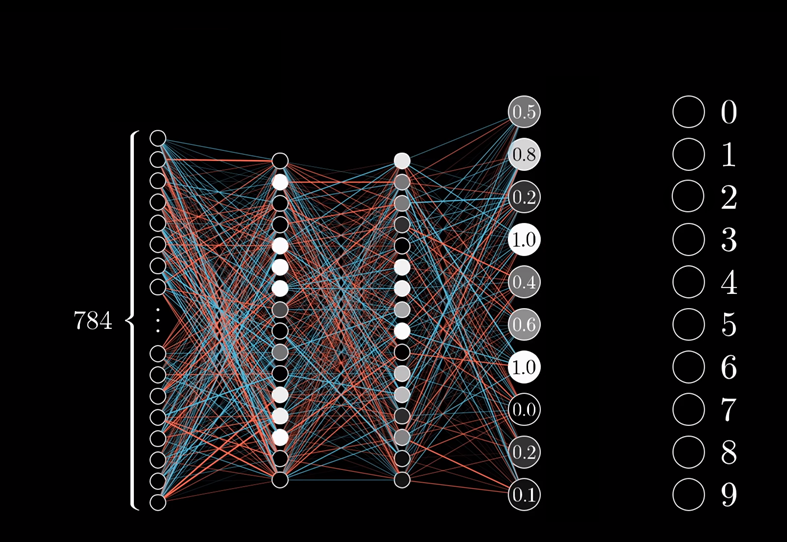

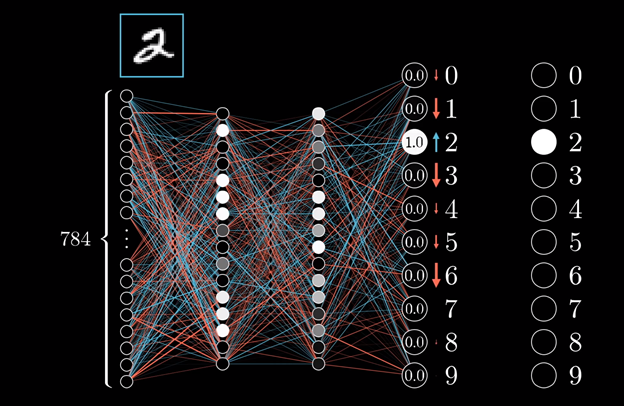

The update step can be thought of as a series of linear regressions to achieve the best result. The trick here is to make sure that you don't overcorrect and make networks biased to certain data.

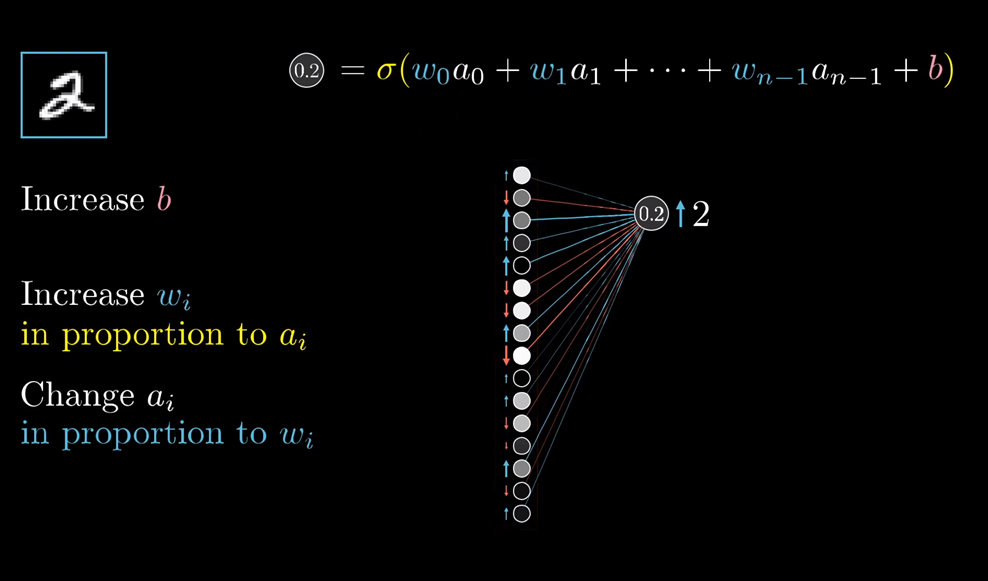
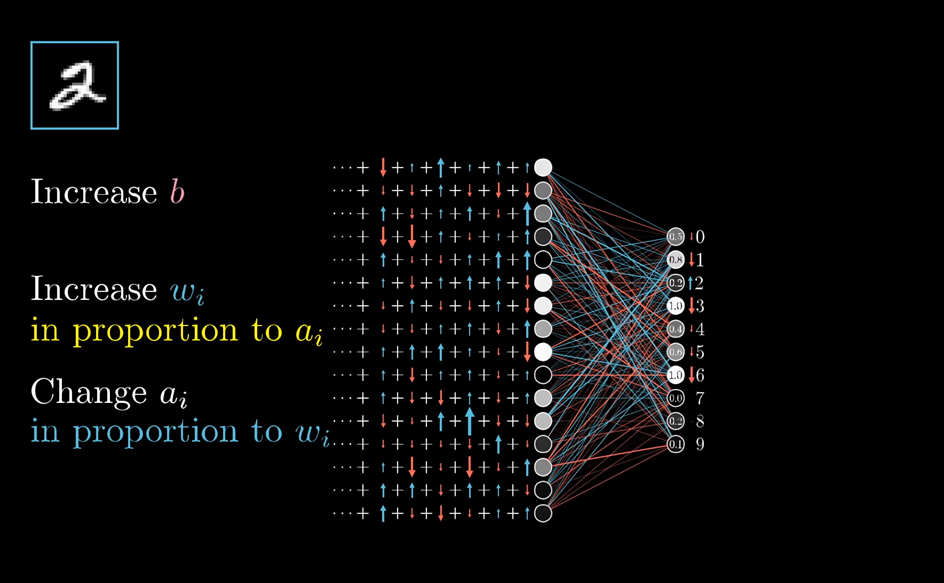

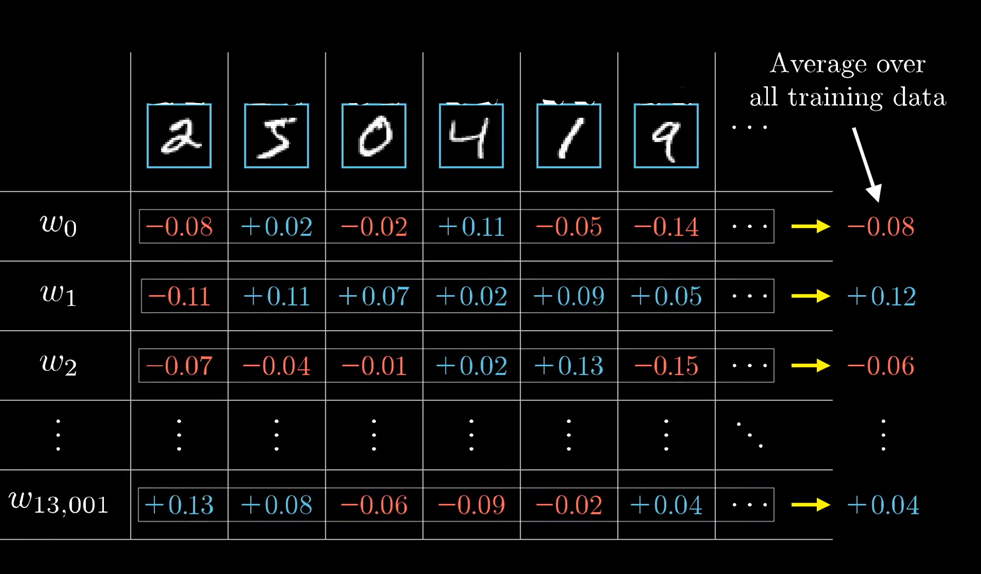

Back Propagation is how neural networks learn over time. These changes are made to the weights to get more and more tuned to be able to predict every class. Gradient descent is a basic optimization algorithm we can use for our models to learn. 

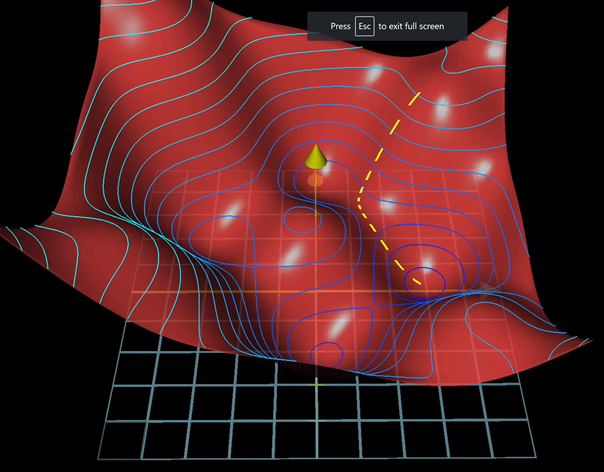

Although true Gradient descent is very accurate, Its also very slow. We instead use stocastic gradient descent to speed up the process. It does the same process but in batches and goes down the slope more like a drunken man than a slow and steady blind man.

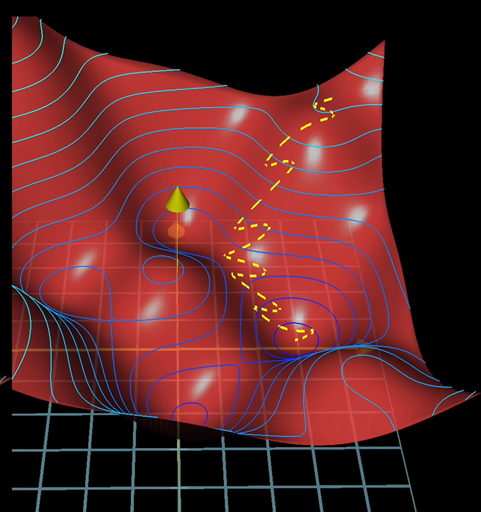

The update step for each individual neuron in each layer can be described in the equations below

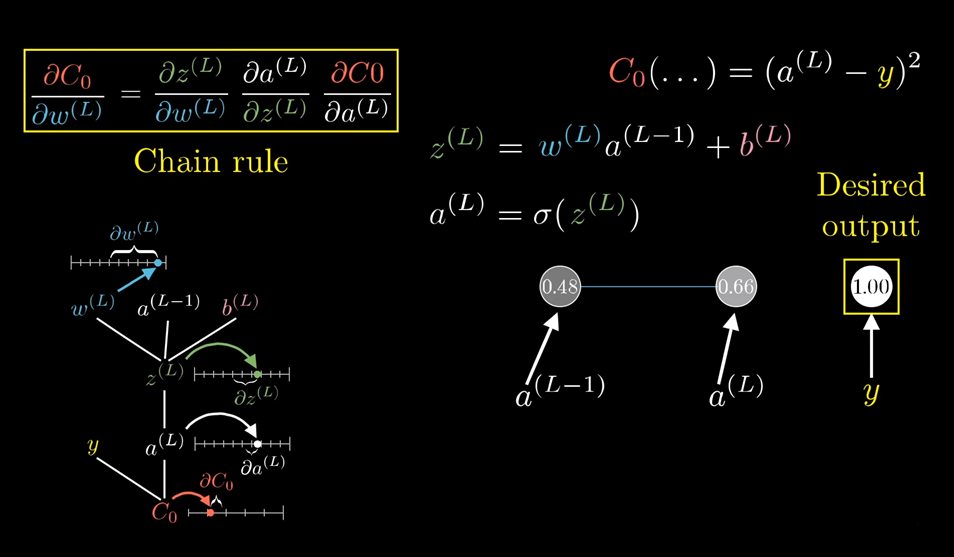
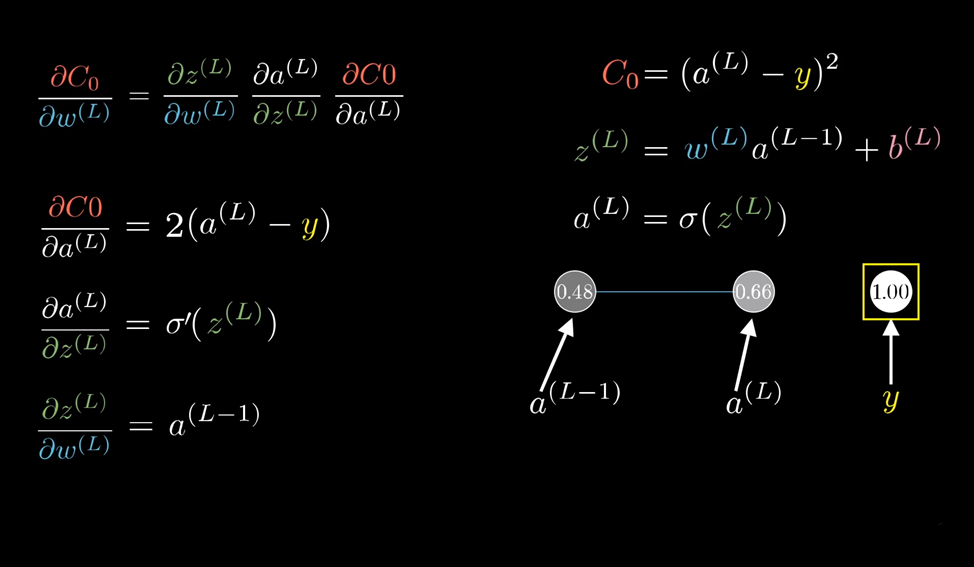
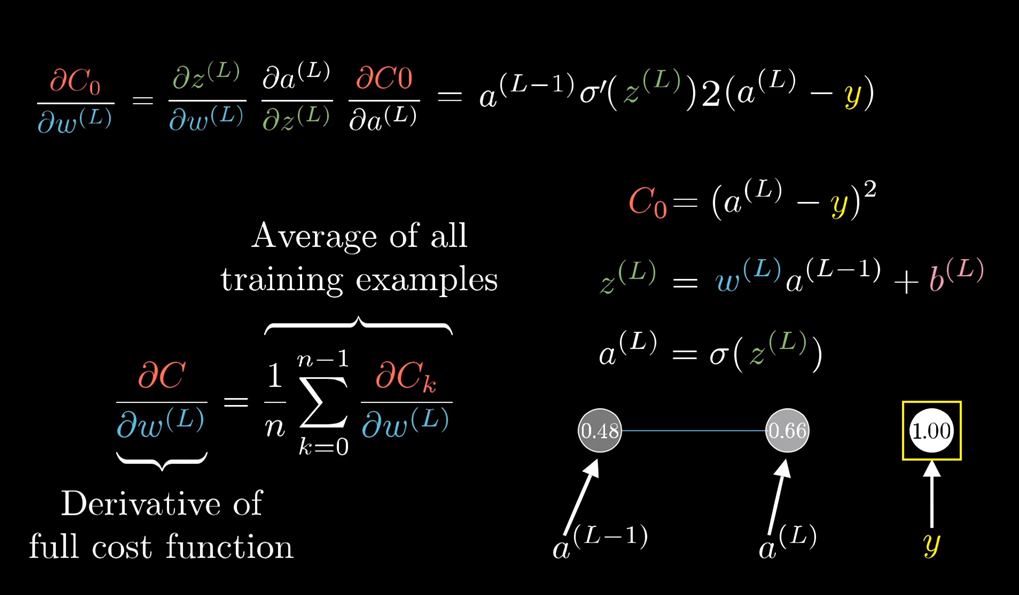

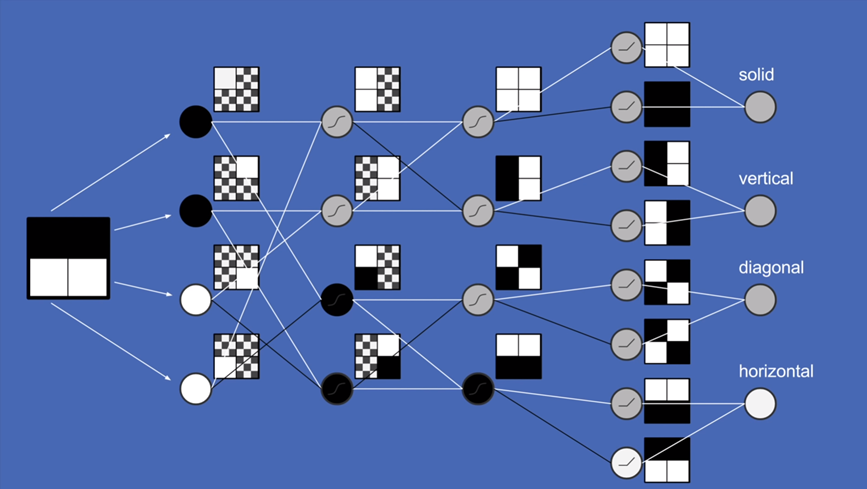

#### Problems facing neural networks include:

Exploding and Vanishing gradients,
Overfitting and Underfitting,
Data Shift,
Computional Complexity and Time Constraints,
Underspecification


Vanishing Gradients cause dead neurons and Exploding Gradients cause models to never converge. 

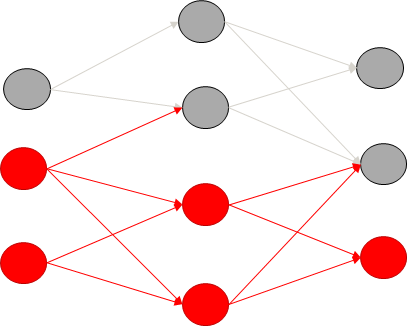

Normalization techniques and weight constraints help deal with exploding and vanishing gradients. We idealy want our weights to be small(under 4.0) in order to not do too big of an update in back prop but not too small (over 0.01) that they can vanish with the wrong math operation.
 
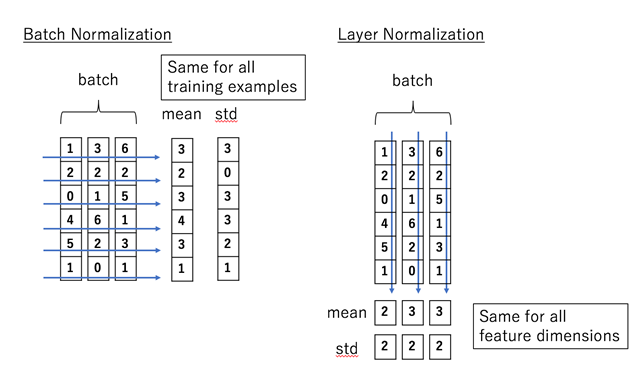

Overfitting is from the model memorizing the training data and not being able to apply that knowledge to new unseen data. 

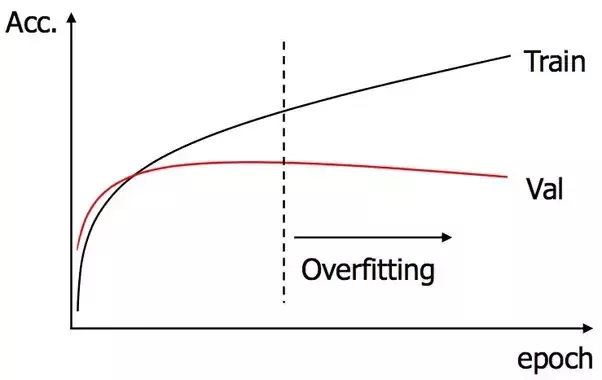


Dropout helps deal with overfitting and computation complexity.

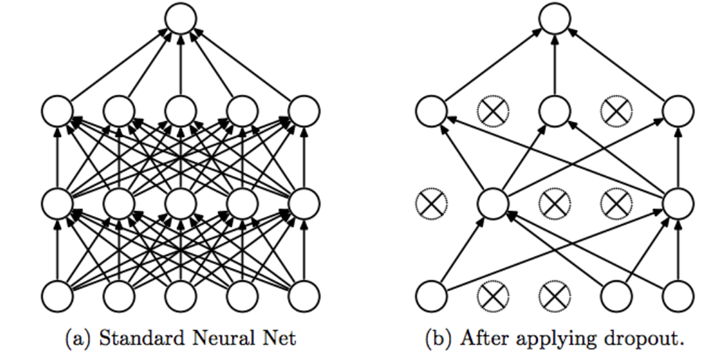

Data Shift is the most common problem in practice when using AI. The data that was used for the training and testing sets do not match what the model experiences in the real world and so the model can't work in the field.

Data augmentation can help deal with that and also help deal with overfitting. 

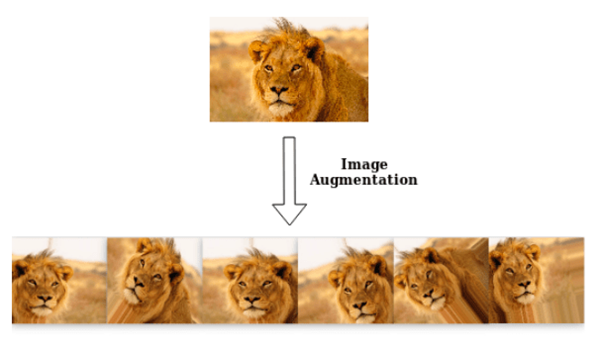

Our goal in training models is to have them have very low bias and be able to extract the true low variance solution regardless of the amount of noise in the data. 

AKA achieve low bias, low variance results with high variance data. 

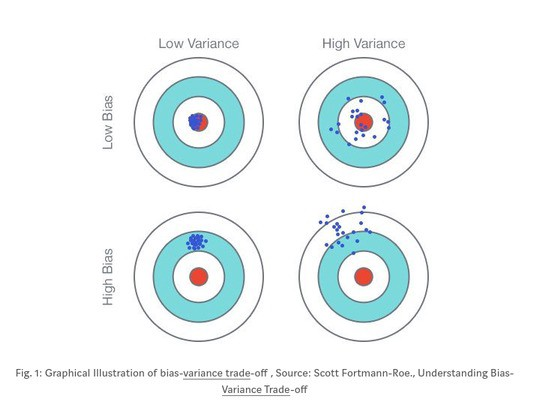

#### The last major failure of neural networks was only recently discovered late last year (3 months ago): 
Underspecification.

This problem comes from the model building on correlations within the data instead of causations. Now you might hear someone screaming about not pursuing causation in the back of your mind from your stats teacher. Ignore that.

Causation is a real thing and we should train our models to find it if it exists in the data. If we don't we run the risk of the model learning something that isn't real. A correlation that isn't because of casuation. Aka Worst case senerio.

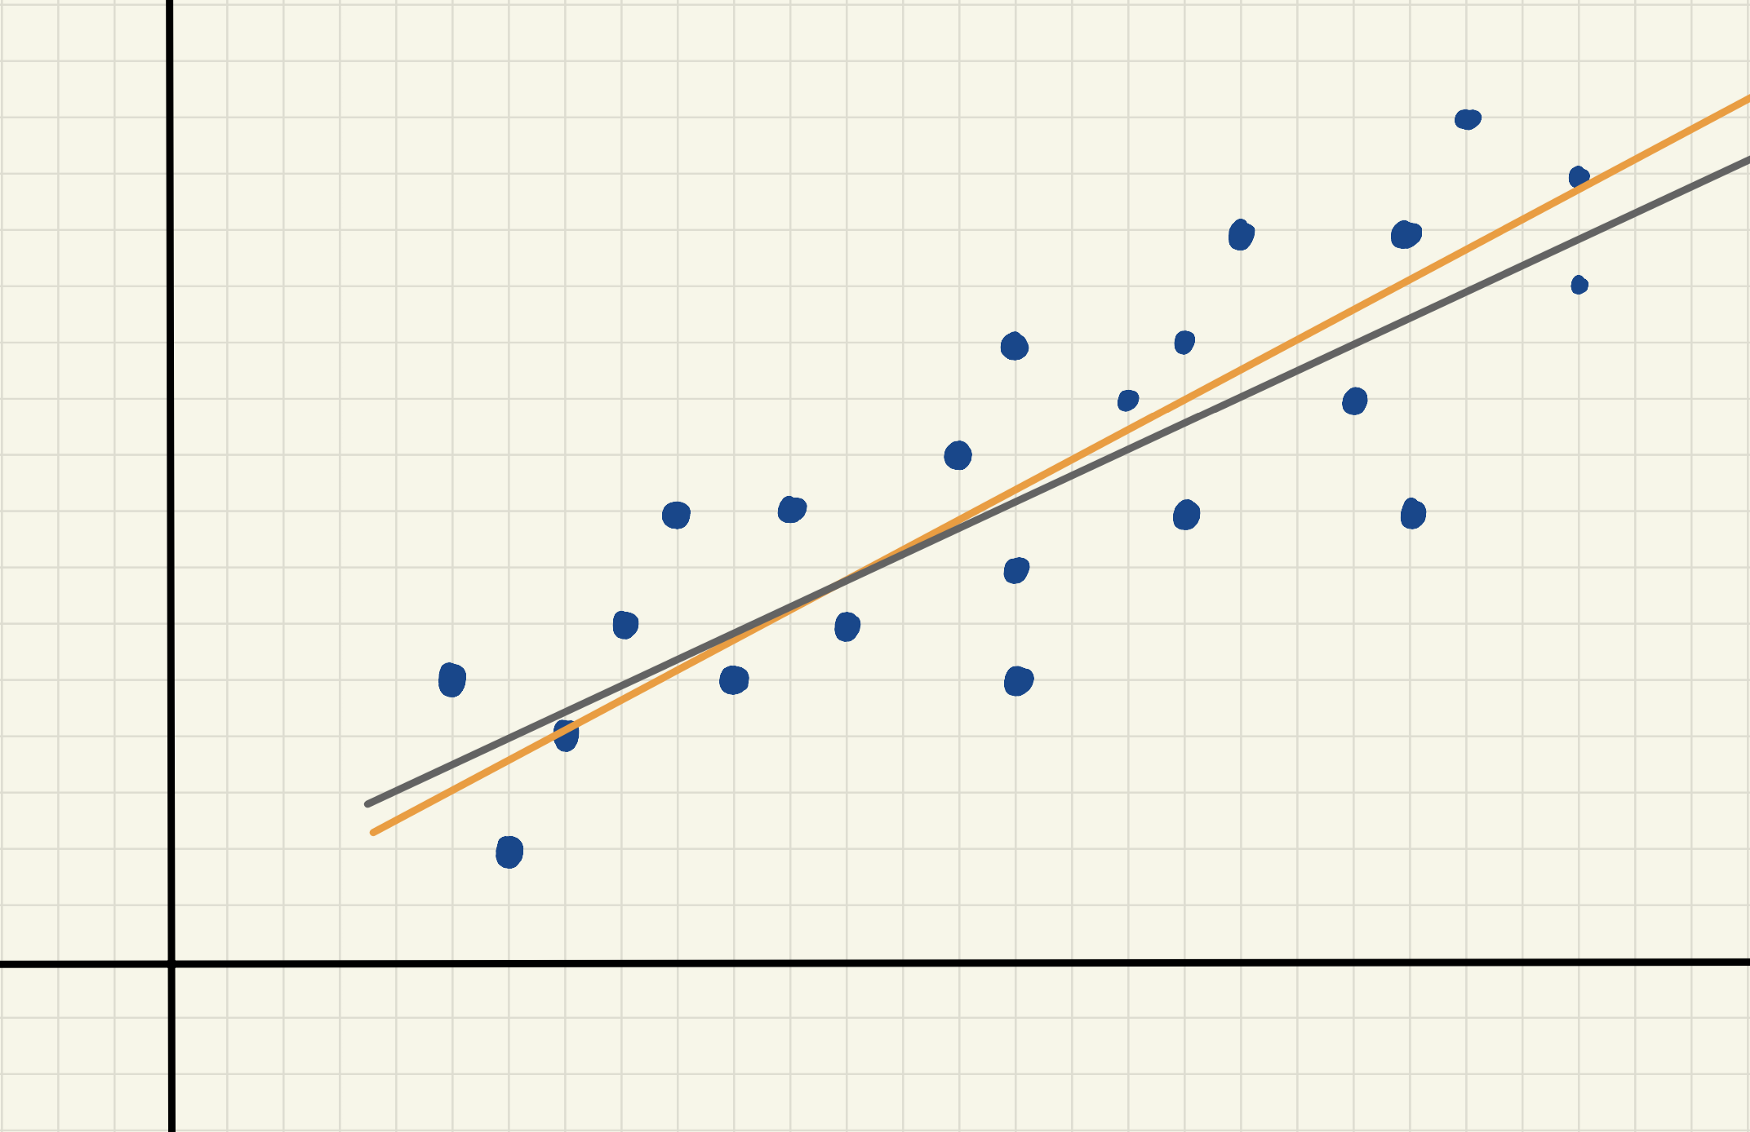

At the end of the day, a model is a simplification of reality. But the way that models are fit, there’s no guarantee that your computer selects a model that reflects the logic or science of your specific application.

Ways around this are:

Collecting training and testing data seperately and differently instead of spliting them from the same dataset. 
Minimize the gap between the distribution of your training data and the real world distribution.
Conduct stress tests on your models using different random seeds and techniques (Stratified Performance Evaluations, Shifted Performance Evaluations, Contrastive Evaluations).
Tweak modeling choices you are making (we'll get to this later but things like step size and model structure)
Make sure your machine learning pipeline is reproducible.

https://arxiv.org/pdf/2011.03395.pdf

https://arxiv.org/pdf/1910.02600.pdf

In [1]:
from __future__ import print_function

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.regularizers import l2
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Packages Loaded")

Packages Loaded


In [2]:
import numpy as np

from numpy import *

np.random.seed(1234)

In [3]:
def relu(input):
    output = max(0, input)

    return(output)

def sigmoid(input):
    output = 1 / (1 + np.exp(-input))
    return output

In [4]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]

weights = {'node_0_0': np.array([1, 1]),
           'node_0_1': np.array([-1, 1]),
           'node_1_0': np.array([1, 1]),
           'node_1_1': np.array([2, 2]),
           'output': np.array([2, 1])}

In [5]:
def predict_with_network(input_data, weights):

    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    model_output = (hidden_1_outputs * weights['output']).sum()
    
    return(model_output)

In [6]:
output = predict_with_network(input_data, weights)
print("Output: {}".format(output))

target_actual = 3

model_output = predict_with_network(input_data, weights)
error = model_output - target_actual

print("Error: {}".format(error))

Output: 28
Error: 25


In [7]:
weights = {'node_0_0': np.array([1, .5]),
           'node_0_1': np.array([-1, 1]),
           'node_1_0': np.array([1, .5]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([1, 0.5])}

output = predict_with_network(input_data, weights)
print("Output: {}".format(output))

target_actual = 3

model_output = predict_with_network(input_data, weights)
error = model_output - target_actual

print("Error: {}".format(error))

Output: 8.25
Error: 5.25


In [8]:
weights = {'node_0_0': np.array([.95, .4]),
           'node_0_1': np.array([-1, 1]),
           'node_1_0': np.array([1, .5]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([0.1, 0.5])}

output = predict_with_network(input_data, weights)
print("Output: {}".format(output))

target_actual = 3

model_output = predict_with_network(input_data, weights)
error = model_output - target_actual

print("Error: {}".format(error))

Output: 3.0
Error: 0.0


----

In [9]:
x_train = np.random.random((1000, 500))
y_train = np.random.randint(4, size=(1000, 1))
one_hot_labels = tf.keras.utils.to_categorical(y_train, num_classes=4)

one_hot_labels[0]
one_hot_labels

array([0., 0., 1., 0.], dtype=float32)

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [10]:
# NOT A GOOD MODEL!!!

model=Sequential()

model.add(Dense(1000, input_dim=500, activation='relu',kernel_initializer='uniform'))
model.add(Dense(500,input_dim=1000,activation='sigmoid'))
model.add(Dense(150,input_dim=500,activation='sigmoid'))
model.add(Dense(4,activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


model.fit(x_train, one_hot_labels, epochs=40, batch_size=16)

Epoch 1/40
63/63 [==============================] - 0s 2ms/step - loss: 1.4350 - accuracy: 0.2510
Epoch 2/40
63/63 [==============================] - 0s 2ms/step - loss: 1.4225 - accuracy: 0.2420
Epoch 3/40
63/63 [==============================] - 0s 2ms/step - loss: 1.4174 - accuracy: 0.2260
Epoch 4/40
63/63 [==============================] - 0s 2ms/step - loss: 1.4119 - accuracy: 0.2530
Epoch 5/40
63/63 [==============================] - 0s 2ms/step - loss: 1.4054 - accuracy: 0.2700
Epoch 6/40
63/63 [==============================] - 0s 2ms/step - loss: 1.4022 - accuracy: 0.2670
Epoch 7/40
63/63 [==============================] - 0s 2ms/step - loss: 1.3975 - accuracy: 0.2850
Epoch 8/40
63/63 [==============================] - 0s 2ms/step - loss: 1.3967 - accuracy: 0.2670
Epoch 9/40
63/63 [==============================] - 0s 2ms/step - loss: 1.3973 - accuracy: 0.2780
Epoch 10/40
63/63 [==============================] - 0s 2ms/step - loss: 1.3804 - accuracy: 0.2750
Epoch 11/40
63/63 [

In [11]:
# Test for generality and overfitting

x_train = np.random.random((1000, 500))
y_train = np.random.randint(4, size=(1000, 1))
one_hot_labels = tf.keras.utils.to_categorical(y_train, num_classes=4)


model=Sequential()

model.add(Dense(1000, input_dim=500, activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.5))
model.add(Dense(500,input_dim=1000,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(150,input_dim=500,activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])


model.fit(x_train, one_hot_labels, epochs=20, batch_size=16)

Epoch 1/20
63/63 [==============================] - 0s 2ms/step - loss: 1.5596 - accuracy: 0.2570
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 1.4629 - accuracy: 0.2470
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 1.4288 - accuracy: 0.2540
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 1.4069 - accuracy: 0.2660
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 1.4003 - accuracy: 0.2770
Epoch 6/20
63/63 [==============================] - 0s 2ms/step - loss: 1.4132 - accuracy: 0.2660
Epoch 7/20
63/63 [==============================] - 0s 2ms/step - loss: 1.4012 - accuracy: 0.2680
Epoch 8/20
63/63 [==============================] - 0s 2ms/step - loss: 1.3967 - accuracy: 0.2720
Epoch 9/20
63/63 [==============================] - 0s 2ms/step - loss: 1.3978 - accuracy: 0.2610
Epoch 10/20
63/63 [==============================] - 0s 2ms/step - loss: 1.3929 - accuracy: 0.2550
Epoch 11/20
63/63 [

----

----

----

In [12]:
insurance = pd.read_csv('insurance.csv')
target = insurance['charges']
insurance = insurance.drop('charges', axis=1)
from sklearn.preprocessing import LabelEncoder
insurance = insurance.apply(LabelEncoder().fit_transform)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(insurance, target, test_size=0.30, shuffle=False)
x_train
y_train

age  sex  bmi  children  smoker  region
0      1    0  197         0       1       3
1      0    1  350         1       0       2
2     10    1  331         3       0       2
3     15    1   73         0       0       1
4     14    1  223         0       0       1
..   ...  ...  ...       ...     ...     ...
931   21    0  318         1       0       3
932   28    1  146         5       0       3
933   27    0  384         0       0       3
934   14    1  431         2       0       2
935   41    0  186         0       0       3

[936 rows x 6 columns]

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
931     6238.29800
932    10096.97000
933     7348.14200
934     4673.39220
935    12233.82800
Name: charges, Length: 936, dtype: float64

In [13]:
# Deep Regression

model = Sequential()

model.add(Dense(2048, kernel_initializer='normal',input_dim = 6, activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(2048,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(2048,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(2048,activation='relu', kernel_regularizer=l2(0.01)))

model.add(Dense(1,activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
30/30 [==============================] - 1s 17ms/step - loss: 9382.8926 - mean_absolute_error: 9346.0732 - val_loss: 8919.0566 - val_mean_absolute_error: 8894.8057
Epoch 2/10
30/30 [==============================] - 0s 7ms/step - loss: 8097.5137 - mean_absolute_error: 8073.9722 - val_loss: 7522.9956 - val_mean_absolute_error: 7498.9380
Epoch 3/10
30/30 [==============================] - 0s 7ms/step - loss: 6610.9937 - mean_absolute_error: 6587.4897 - val_loss: 7497.1177 - val_mean_absolute_error: 7474.0303
Epoch 4/10
30/30 [==============================] - 0s 7ms/step - loss: 6422.8960 - mean_absolute_error: 6400.4434 - val_loss: 7424.1279 - val_mean_absolute_error: 7402.1006
Epoch 5/10
30/30 [==============================] - 0s 7ms/step - loss: 6520.7446 - mean_absolute_error: 6499.0039 - val_loss: 7290.0630 - val_mean_absolute_error: 7268.6475
Epoch 6/10
30/30 [==============================] - 0s 7ms/step - loss: 6311.1411 - mean_absolute_error: 6289.9814 - val_loss: 72

----

----

----

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
np.get_printoptions()['linewidth']

75

In [16]:
np.set_printoptions(linewidth=200)

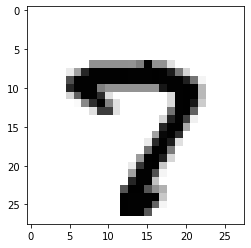

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   1 109 109 109 109 110 109 129 253 110 109  31   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  21  94 217 252 252 252 252 253 252 252 252 253 252 227 13

In [17]:
plt.imshow(x_train[52], cmap = plt.cm.binary)
plt.show()
print(x_train[52])

In [18]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [19]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5970 - accuracy: 0.8108 - val_loss: 0.1866 - val_accuracy: 0.9430
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2592 - accuracy: 0.9259 - val_loss: 0.1500 - val_accuracy: 0.9538
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2039 - accuracy: 0.9422 - val_loss: 0.1216 - val_accuracy: 0.9641
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1751 - accuracy: 0.9498 - val_loss: 0.1120 - val_accuracy: 0.9666
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1522 - accuracy: 0.9542 - val_loss: 0.1058 - val_accuracy: 0.9697
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1430 - accuracy: 0.9572 - val_loss: 0.1037 - val_accuracy: 0.9703
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1339 - accuracy: 0.9600 - val_loss: 0.0998 - val_accuracy: 0.9707
Epoch 

In [20]:
from tensorflow.keras.models import load_model

model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [21]:
model = load_model('model.h5')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                50240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [22]:
batch_size = 128
epochs = 20

inputs = tf.keras.Input(shape=(784,), name='img')
x = Dense(128, activation='relu')(inputs)
block_1_output = Dense(128, activation='relu')(x)

x = Dense(128)(block_1_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
block_2_output = tf.keras.layers.add([x, block_1_output])

x = Dense(128)(block_2_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
block_3_output = tf.keras.layers.add([x, block_2_output])

x = Dense(128)(block_3_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
block_4_output = tf.keras.layers.add([x, block_3_output])

x = Dense(128)(block_4_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
block_5_output = tf.keras.layers.add([x, block_4_output])

x = Dense(128)(block_5_output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
block_6_output = tf.keras.layers.add([x, block_5_output])

x = Dense(128, activation='relu')(block_6_output)
outputs = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs, name='resnet')

model.compile(Adam(amsgrad=True), 'categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.5361 - accuracy: 0.8301 - val_loss: 0.1764 - val_accuracy: 0.9446
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1851 - accuracy: 0.9443 - val_loss: 0.1219 - val_accuracy: 0.9628
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1300 - accuracy: 0.9606 - val_loss: 0.1082 - val_accuracy: 0.9663
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.1009 - accuracy: 0.9698 - val_loss: 0.1121 - val_accuracy: 0.9648
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0817 - accuracy: 0.9749 - val_loss: 0.0873 - val_accuracy: 0.9726
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0669 - accuracy: 0.9790 - val_loss: 0.0878 - val_accuracy: 0.9743
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0557 - accuracy: 0.9825 - val_loss: 0.0803 - val_accuracy: 0.9780
E

In [23]:
model.save("model.h5")
print("Saved model to disk")

model = load_model('model.h5')

model.summary()

Saved model to disk
Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_17 (Dense)                (None, 128)          100480      img[0][0]                        
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 128)          16512       dense_17[0][0]                   
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 128)          16512       dense_18[0][0]                   
_________________________________________________________________________

In [24]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.0953 - val_accuracy: 0.9782
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0925 - val_accuracy: 0.9797
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0077 - accuracy: 0.9974 - val_loss: 0.0882 - val_accuracy: 0.9810
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0897 - val_accuracy: 0.9809
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.0980 - val_accuracy: 0.9785
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0846 - val_accuracy: 0.9813
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0929 - val_accuracy: 0.9812
Epoch 

In [25]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5965 - accuracy: 0.8123 - val_loss: 0.1979 - val_accuracy: 0.9416
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2603 - accuracy: 0.9239 - val_loss: 0.1510 - val_accuracy: 0.9561
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2051 - accuracy: 0.9408 - val_loss: 0.1295 - val_accuracy: 0.9617
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1802 - accuracy: 0.9484 - val_loss: 0.1188 - val_accuracy: 0.9652
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1592 - accuracy: 0.9545 - val_loss: 0.1070 - val_accuracy: 0.9693
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1465 - accuracy: 0.9578 - val_loss: 0.1007 - val_accuracy: 0.9704
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1340 - accuracy: 0.9608 - val_loss: 0.0988 - val_accuracy: 0.9707
Epoch 

In [26]:
preds = model.predict(x_test)

In [27]:
np.sum(y_test, axis=0)
tf.math.confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974., 1009.], dtype=float32)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    0,    2,    0,    2,    4,    1,    3,    1],
       [   0, 1123,    5,    1,    0,    0,    1,    1,    4,    0],
       [   4,    3, 1000,    7,    4,    1,    1,    7,    5,    0],
       [   0,    1,    4,  981,    1,    7,    0,    7,    4,    5],
       [   0,    0,    3,    0,  957,    0,    7,    1,    1,   13],
       [   2,    1,    0,    9,    3,  859,    6,    1,    8,    3],
       [   4,    3,    0,    1,    6,    3,  935,    0,    6,    0],
       [   2,    2,   12,    3,    1,    0,    0, 1003,    0,    5],
       [   4,    4,    3,    4,    5,    4,    1,    6,  939,    4],
       [   2,    2,    0,    4,   14,    6,    0,    7,    3,  971]])>

In [28]:
model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2290 - accuracy: 0.9295 - val_loss: 0.1339 - val_accuracy: 0.9616
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0957 - accuracy: 0.9706 - val_loss: 0.0763 - val_accuracy: 0.9756
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0706 - accuracy: 0.9781 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0552 - accuracy: 0.9823 - val_loss: 0.0771 - val_accuracy: 0.9768
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0471 - accuracy: 0.9857 - val_loss: 0.0697 - val_accuracy: 0.9805
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0434 - accuracy: 0.9870 - val_loss: 0.0787 - val_accuracy: 0.9779
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0684 - val_accuracy: 0.9804
Epoch 

In [29]:
preds = model.predict(x_test)

In [30]:
np.sum(y_test, axis=0)
tf.math.confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974., 1009.], dtype=float32)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    1,    2,    0,    0,    1,    3,    1,    2,    6],
       [   0, 1127,    2,    2,    0,    0,    0,    0,    4,    0],
       [   0,    1, 1020,    3,    1,    0,    0,    4,    2,    1],
       [   0,    0,    5,  994,    0,    2,    0,    3,    4,    2],
       [   0,    0,    2,    0,  962,    0,    4,    2,    0,   12],
       [   2,    0,    0,    7,    0,  878,    2,    1,    2,    0],
       [   2,    3,    0,    0,    4,    2,  946,    0,    1,    0],
       [   0,    4,    8,    1,    1,    0,    0, 1006,    2,    6],
       [   0,    0,    3,    4,    2,    1,    2,    3,  957,    2],
       [   1,    2,    0,    5,    5,    2,    0,    1,    1,  992]])>

In [31]:
model = Sequential()

model.add(Dense(2048, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

class_weight = {0: 1.,
                1: 1.,
                2: 1.4,
                3: 1.2,
                4: 1.6,
                5: 1.6,
                6: 1.,
                7: 1.,
                8: 1.8,
                9: 2.0}

model.fit(x_train, y_train, epochs=60, batch_size=128, validation_data=(x_test, y_test), class_weight=class_weight)

Epoch 1/60
469/469 [==============================] - 5s 11ms/step - loss: 0.3262 - accuracy: 0.9288 - val_loss: 0.1548 - val_accuracy: 0.9550
Epoch 2/60
469/469 [==============================] - 5s 11ms/step - loss: 0.1398 - accuracy: 0.9698 - val_loss: 0.1682 - val_accuracy: 0.9478
Epoch 3/60
469/469 [==============================] - 5s 11ms/step - loss: 0.1018 - accuracy: 0.9782 - val_loss: 0.0783 - val_accuracy: 0.9763
Epoch 4/60
469/469 [==============================] - 5s 11ms/step - loss: 0.0836 - accuracy: 0.9812 - val_loss: 0.0884 - val_accuracy: 0.9755
Epoch 5/60
469/469 [==============================] - 5s 11ms/step - loss: 0.0711 - accuracy: 0.9849 - val_loss: 0.0710 - val_accuracy: 0.9800
Epoch 6/60
469/469 [==============================] - 5s 11ms/step - loss: 0.0633 - accuracy: 0.9865 - val_loss: 0.0780 - val_accuracy: 0.9784
Epoch 7/60
469/469 [==============================] - 5s 11ms/step - loss: 0.0561 - accuracy: 0.9878 - val_loss: 0.0789 - val_accuracy: 0.9803

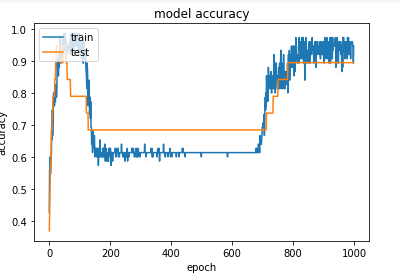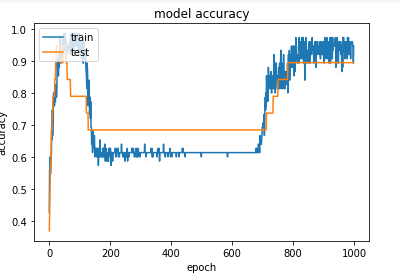

In [32]:
preds = model.predict(x_test)

In [33]:
np.sum(y_test, axis=0)
tf.math.confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974., 1009.], dtype=float32)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    0,    0,    2,    1,    1,    0,    1,    1,    0],
       [   3, 1123,    1,    4,    0,    1,    1,    1,    1,    0],
       [   2,    0, 1015,    3,    2,    0,    0,    4,    5,    1],
       [   0,    0,    1,  998,    0,    2,    0,    2,    5,    2],
       [   1,    0,    1,    0,  965,    0,    4,    2,    1,    8],
       [   2,    0,    0,   10,    0,  875,    3,    0,    1,    1],
       [   3,    2,    0,    1,    2,    3,  944,    0,    3,    0],
       [   0,    1,    5,    0,    1,    0,    0, 1013,    4,    4],
       [   0,    0,    1,    2,    0,    2,    1,    2,  963,    3],
       [   0,    1,    0,    1,    4,    1,    0,    1,    3,  998]])>

In [34]:
model = Sequential()

model.add(Dense(2048, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

class_weight = {0: 1.,
                1: 1.,
                2: 1.,
                3: 1.,
                4: 1.,
                5: 1.,
                6: 1.,
                7: 1.5,
                8: 2.,
                9: 2.}

model.fit(x_train, y_train, epochs=60, batch_size=128, validation_data=(x_test, y_test), class_weight=class_weight)

Epoch 1/60
469/469 [==============================] - 5s 11ms/step - loss: 0.3025 - accuracy: 0.9263 - val_loss: 0.1114 - val_accuracy: 0.9660
Epoch 2/60
469/469 [==============================] - 5s 11ms/step - loss: 0.1284 - accuracy: 0.9691 - val_loss: 0.0900 - val_accuracy: 0.9743
Epoch 3/60
469/469 [==============================] - 5s 10ms/step - loss: 0.0952 - accuracy: 0.9768 - val_loss: 0.0842 - val_accuracy: 0.9764
Epoch 4/60
469/469 [==============================] - 5s 10ms/step - loss: 0.0766 - accuracy: 0.9810 - val_loss: 0.0772 - val_accuracy: 0.9770
Epoch 5/60
469/469 [==============================] - 5s 11ms/step - loss: 0.0624 - accuracy: 0.9848 - val_loss: 0.0718 - val_accuracy: 0.9796
Epoch 6/60
469/469 [==============================] - 5s 11ms/step - loss: 0.0613 - accuracy: 0.9847 - val_loss: 0.0827 - val_accuracy: 0.9784
Epoch 7/60
469/469 [==============================] - 5s 11ms/step - loss: 0.0534 - accuracy: 0.9869 - val_loss: 0.0973 - val_accuracy: 0.9765

In [35]:
preds = model.predict(x_test)

In [36]:
np.sum(y_test, axis=0)
tf.math.confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1))

array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974., 1009.], dtype=float32)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    1,    1,    0,    0,    0,   10,    1,    2,    0],
       [   0, 1119,    2,    1,    0,    1,    3,    2,    7,    0],
       [   1,    0, 1017,    2,    1,    0,    2,    4,    5,    0],
       [   0,    0,    3,  993,    0,    7,    0,    2,    2,    3],
       [   0,    0,    2,    0,  966,    0,    5,    2,    1,    6],
       [   0,    0,    0,    2,    1,  868,    9,    1,    7,    4],
       [   1,    2,    0,    0,    1,    2,  952,    0,    0,    0],
       [   2,    0,    9,    1,    1,    0,    0, 1012,    2,    1],
       [   1,    0,    1,    5,    3,    0,    2,    2,  957,    3],
       [   0,    2,    1,    4,   11,    1,    2,    2,    1,  985]])>

In [37]:
from tensorflow.keras import layers

layers.Dense(units=64, activation=('relu'), 
    use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
    kernel_regularizer=tf.keras.regularizers.l2(0.01), activity_regularizer=tf.keras.regularizers.l1(0.01),
    bias_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01), kernel_constraint=max_norm(2.), bias_constraint=None)

In [38]:
layers.Conv2D(filters=64, kernel_size=5, strides=(1, 1), padding='valid', data_format='channels_last', dilation_rate=(1, 1), 
    activation="relu", 
    use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, 
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

In [39]:
layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format='channels_last')


In [40]:
layers.LSTM(units=64, activation='tanh', recurrent_activation='sigmoid', use_bias=True, 
                  kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', 
                  unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, 
                  activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, 
                  dropout=0.0, recurrent_dropout=0.0, implementation=2, return_sequences=False, return_state=False, 
                  go_backwards=False, stateful=False, unroll=False)


In [41]:
layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', 
                                gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', 
                                beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)


In [42]:
inputs = tf.keras.Input(shape=(32,))

x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)

output1 = layers.Dense(64, activation='relu')(x)
output2 = layers.Dense(64, activation='relu')(x)

added = tf.keras.layers.Add()([output1, output2])
subtracted = tf.keras.layers.Subtract()([output1, output2])

multiply = tf.keras.layers.Multiply()([output1, output2])
concatenate = tf.keras.layers.Concatenate()([output1, output2])
average = tf.keras.layers.Average()([output1, output2])

predictions = layers.Dense(10)(added)

Activations = sigmoid, tanh, relu, leaky relu, prelu, elu, threshold relu, selu, softmax, linear, softplus, softsign, hard sigmoid, exponential.

initializers = zeros, ones, constant, random normal, random uniform, truncated normal, variance scaling, orthogonal, identity, lecun uniform, glorot normal, glorot uniform, he normal, lecun normal, he uniform. 

losses = mean squared error, mean absolute error, mean absolute percentage error, mean squared logarithmic error, squared hinge, hinge, categorical hinge, logcash, huber loss, categorical crossentropy, sparse categorical crossentropy, binary crossentropy, kullback leibler divergence, poisson, cosine proximity, is categorical crossentropy.

optimizers = SGD, rms prop, adagrad, adadelta, adamax, adam, nadam, amsgrad. 

metrics = accuracy, binary accuracy, categorical accuracy, sparse categorical accuracy, top k categorical accuracy, sparse top k categorical accuracy, cosine proximity, clone metric. 

https://www.tensorflow.org/versions/r2.0/api_docs/python/tf

https://keras.io/